# Use Case for Hackathon

### We get a dataset, we have to understand it and get value from it

A school wants to hire us to see whether we are able to understand some problems they believe they are facing. 

Something is going wrong with the performance of the students but they are not able to figure it out and give reasons to it. 

Some parents are very disappointed of the grades of their kids and have complaint continiously to the board of the school. 

Our company is low on budget and we accept the deal even if it is risky, stressful and the money won't cover much of our runaway either but we take what we get. 

## Let's get to it and try to help the School!

### Import dataset and do the first general analysis

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
url='https://drive.google.com/file/d/1ETCwd-hUZ_qhQX0M0OY6OAddVE4bCSOW/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]

df = pd.read_csv(url)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,id_student,address,Year,Age
0,Male,group A,high school,standard,completed,67,67,63,1000,NaN,2023,14.0
1,Female,group D,some high school,free/reduced,none,40,29,55,1001,NaN,2023,17.0
2,Male,group E,some college,free/reduced,none,59,60,50,1002,NaN,2023,14.0
3,Male,group B,high school,standard,none,77,78,68,1003,NaN,2023,17.0
4,Male,group E,associate's degree,standard,completed,78,73,68,1004,NaN,2023,16.0


In [6]:
print("Información general del dataset:")
print(df.info())

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1010 non-null   object 
 1   race/ethnicity               1010 non-null   object 
 2   parental level of education  1010 non-null   object 
 3   lunch                        1010 non-null   object 
 4   test preparation course      1010 non-null   object 
 5   math score                   1010 non-null   int64  
 6   reading score                1010 non-null   int64  
 7   writing score                1010 non-null   int64  
 8   id_student                   1010 non-null   int64  
 9   address                      0 non-null      float64
 10  Year                         1010 non-null   int64  
 11  Age                          943 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory u

In [7]:
print("Estadísticas descriptivas:")
print(df.describe())

Estadísticas descriptivas:
        math score  reading score  writing score   id_student  address  \
count  1010.000000    1010.000000    1010.000000  1010.000000      0.0   
mean     66.420792      64.930693      70.289109  1494.599010      NaN   
std      15.481187      18.990769      19.125831   291.537945      NaN   
min      13.000000      15.000000      23.000000  1000.000000      NaN   
25%      56.000000      54.000000      58.000000  1242.250000      NaN   
50%      66.000000      68.000000      68.000000  1494.500000      NaN   
75%      77.000000      78.000000      79.000000  1746.750000      NaN   
max     120.000000     100.000000     100.000000  1999.000000      NaN   

              Year         Age  
count  1010.000000  943.000000  
mean   2021.104950   15.483563  
std       7.681396    1.151707  
min    1990.000000   14.000000  
25%    2023.000000   14.000000  
50%    2023.000000   16.000000  
75%    2023.000000   17.000000  
max    2023.000000   17.000000  


## What information do we get from this? 

1. Why is student id int? If it is a string. It is not a number

2. We need to inspect all the object columns and check the value counts. What do we discover when we do it? 

3. The distribution of the year column is a bit odd. We need to look more into it. 

4. Do we have duplicates in the dataset?

5. All rows of the column address are missing, maybe we can just delete it

6. The age column has 77 missing values. What should we do with it? 

7. There seems to be values for the math scores higher than 120. Are those outliers? 

### 1. Change type of student id  

In [8]:
print("1. Cambiar el tipo de ID del estudiante")
# Verificamos el tipo actual
print("Tipo actual de id_student:", df['id_student'].dtype)
# Cambiamos a tipo string/object
df['id_student'] = df['id_student'].astype(str)
print("Nuevo tipo de id_student:", df['id_student'].dtype)

1. Cambiar el tipo de ID del estudiante
Tipo actual de id_student: int64
Nuevo tipo de id_student: object


### 2. Explore the columns that are objects (string)

In [9]:
# Identificamos las columnas de tipo objeto
columnas_objeto = df.select_dtypes(include=['object']).columns
print("Columnas de tipo objeto:", list(columnas_objeto))

Columnas de tipo objeto: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'id_student']


In [10]:
# Exploramos los valores únicos de cada columna de tipo objeto
for col in columnas_objeto:
    print(f"\
Valores únicos en la columna '{col}':")
    print(df[col].value_counts().head(10))  # Mostramos los 10 valores más frecuentes

Valores únicos en la columna 'gender':
gender
male      373
female    337
FEMALE    103
MALE       97
Male       54
Female     46
Name: count, dtype: int64
Valores únicos en la columna 'race/ethnicity':
race/ethnicity
group C    324
group D    265
group B    206
group E    134
group A     81
Name: count, dtype: int64
Valores únicos en la columna 'parental level of education':
parental level of education
some college          225
high school           206
associate's degree    204
some high school      192
bachelor's degree     113
master's degree        70
Name: count, dtype: int64
Valores únicos en la columna 'lunch':
lunch
standard        659
free/reduced    351
Name: count, dtype: int64
Valores únicos en la columna 'test preparation course':
test preparation course
none         672
completed    338
Name: count, dtype: int64
Valores únicos en la columna 'id_student':
id_student
1000    2
1006    2
1009    2
1008    2
1007    2
1001    2
1005    2
1003    2
1002    2
1004    2
Name: c

### 3. Seems that the column gender has a lot of versions we are going to have to fix this

In [11]:
print("\Corregir la columna de género")
print("Valores únicos en la columna 'gender' antes de la corrección:")
print(df['gender'].value_counts())


\Corregir la columna de género
Valores únicos en la columna 'gender' antes de la corrección:
gender
male      373
female    337
FEMALE    103
MALE       97
Male       54
Female     46
Name: count, dtype: int64


In [12]:
# Creamos un diccionario para mapear los valores
mapeo_genero = {
    'Male': 'Masculino',
    'male': 'Masculino',
    'M': 'Masculino',
    'm': 'Masculino',
    'MALE': 'Masculino',
    'Female': 'Femenino',
    'female': 'Femenino',
    'F': 'Femenino',
    'f': 'Femenino',
    'FEMALE': 'Femenino'
}

In [13]:
# Aplicamos 
df['gender'] = df['gender'].map(mapeo_genero).fillna(df['gender'])
print("\
Valores únicos en la columna 'gender' después de la corrección:")
print(df['gender'].value_counts())

Valores únicos en la columna 'gender' después de la corrección:
gender
Masculino    524
Femenino     486
Name: count, dtype: int64


### 4. What may be happening with the year? 

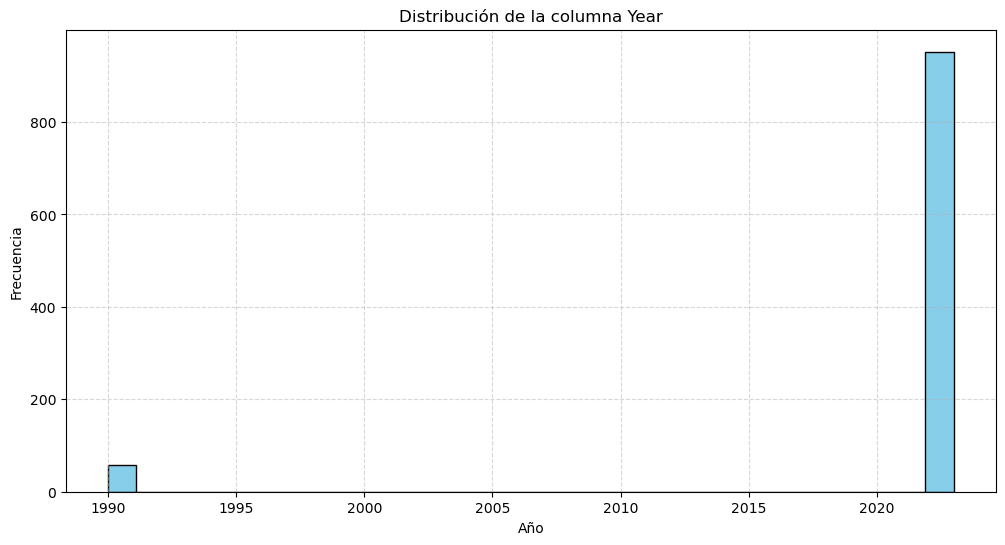

In [16]:
# Verificamos si hay valores atípicos (outliers) HISTOGRAMA
plt.figure(figsize=(12, 6))
plt.hist(df['Year'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de la columna Year')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Eliminamis 1990 pues parece que es un error

In [21]:
# Filtramos el dataframe para eliminar los registros con 'Year' igual a 1990
print("Dimensiones del dataset antes de eliminar registros con Year = 1990:", df.shape)

df = df[df['Year'] != 1990]

print("Dimensiones del dataset después de eliminar registros con Year = 1990:", df.shape)

# Comprobamos que no existan más registros con 1990
print("Valores únicos en 'Year' tras la eliminación:")
print(df['Year'].value_counts())

print("Eliminados los registros de año 1990.")


Dimensiones del dataset antes de eliminar registros con Year = 1990: (952, 12)
Dimensiones del dataset después de eliminar registros con Year = 1990: (952, 12)
Valores únicos en 'Year' tras la eliminación:
Year
2023    952
Name: count, dtype: int64
Eliminados los registros de año 1990.


In [22]:
# Verificamos si hay valores nulos
print("\
¿Hay valores nulos en la columna 'Year'?")
print(df['Year'].isnull().sum(), "valores nulos")

¿Hay valores nulos en la columna 'Year'?
0 valores nulos


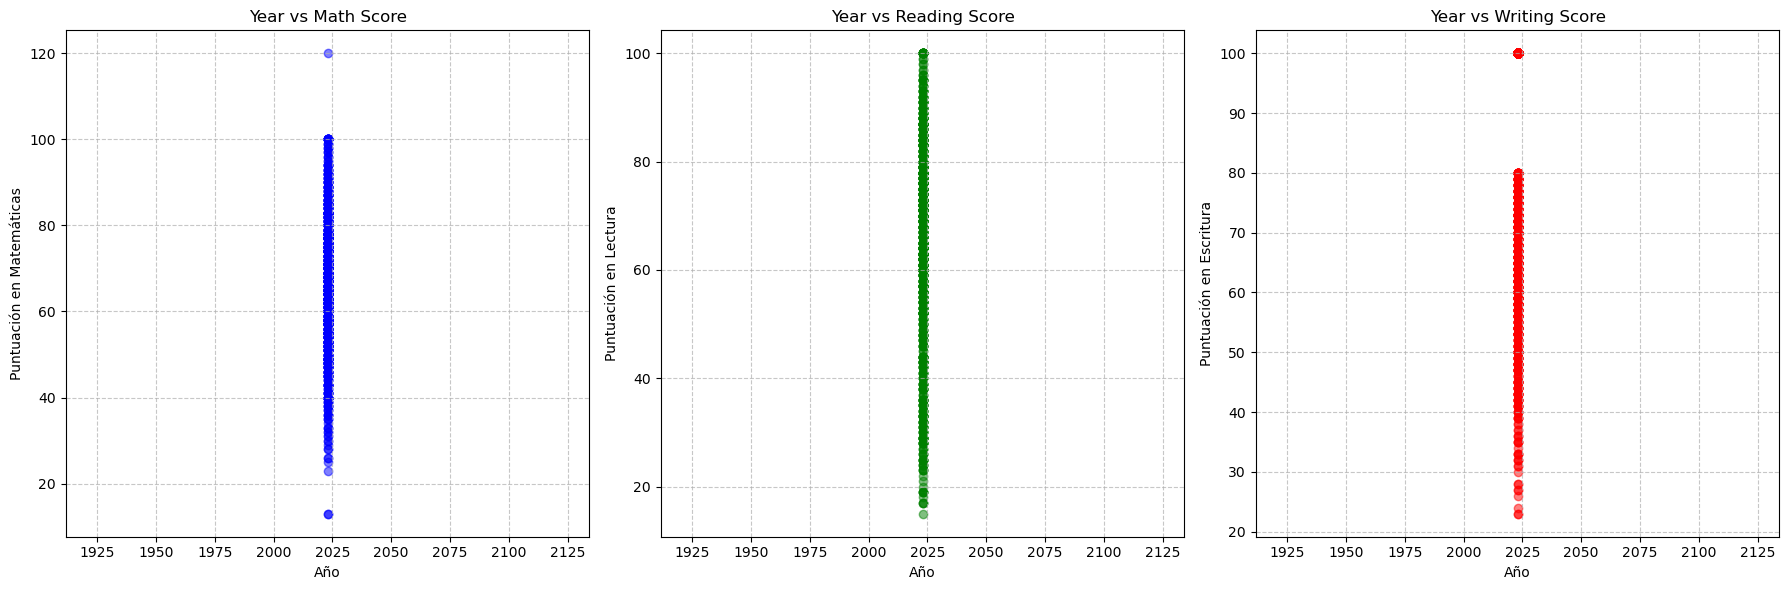

In [23]:
# Verificamos si hay alguna relación entre el año y las calificaciones
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].scatter(df['Year'], df['math score'], alpha=0.5, color='blue')
axes[0].set_title('Year vs Math Score')
axes[0].set_xlabel('Año')
axes[0].set_ylabel('Puntuación en Matemáticas')
axes[0].grid(True, linestyle='--', alpha=0.7)

axes[1].scatter(df['Year'], df['reading score'], alpha=0.5, color='green')
axes[1].set_title('Year vs Reading Score')
axes[1].set_xlabel('Año')
axes[1].set_ylabel('Puntuación en Lectura')
axes[1].grid(True, linestyle='--', alpha=0.7)

axes[2].scatter(df['Year'], df['writing score'], alpha=0.5, color='red')
axes[2].set_title('Year vs Writing Score')
axes[2].set_xlabel('Año')
axes[2].set_ylabel('Puntuación en Escritura')
axes[2].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Análisis de las distribuciones para cada asignatura

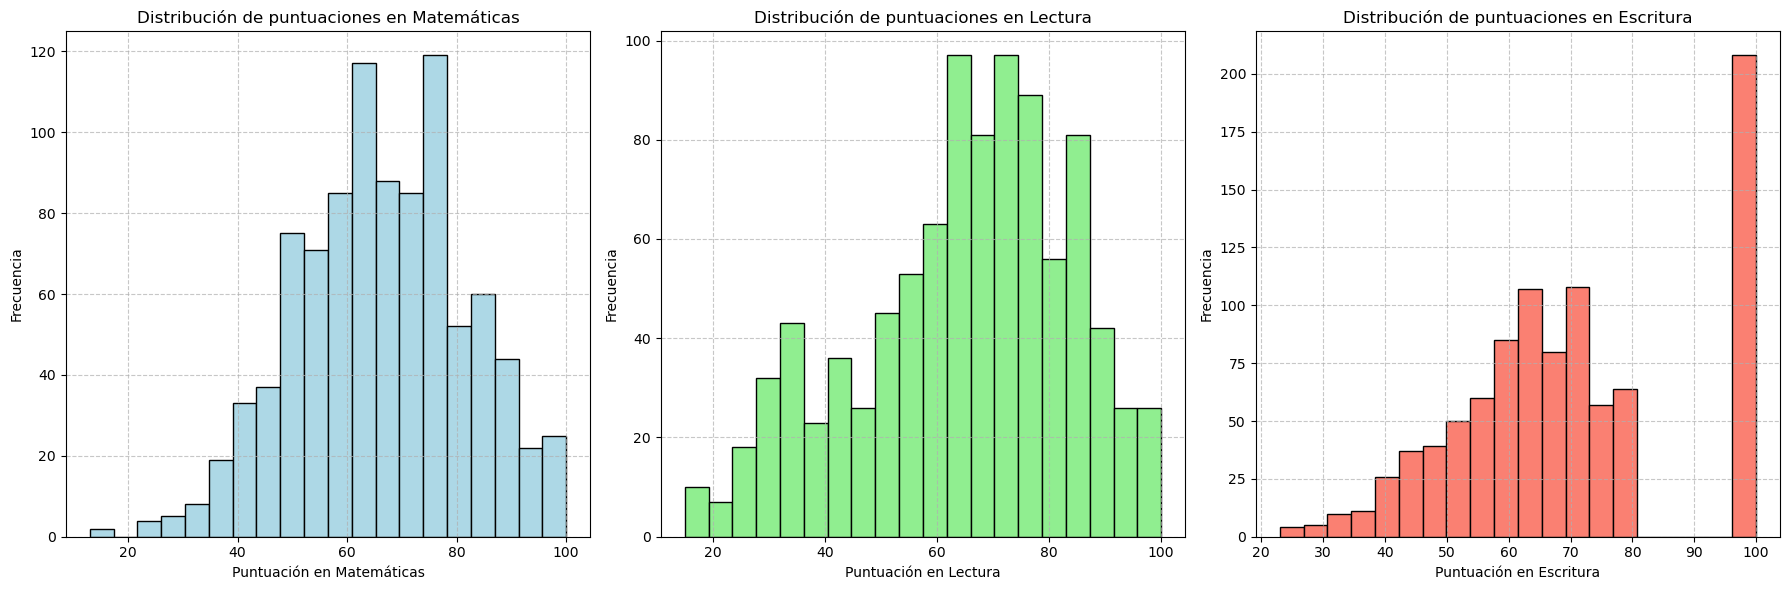

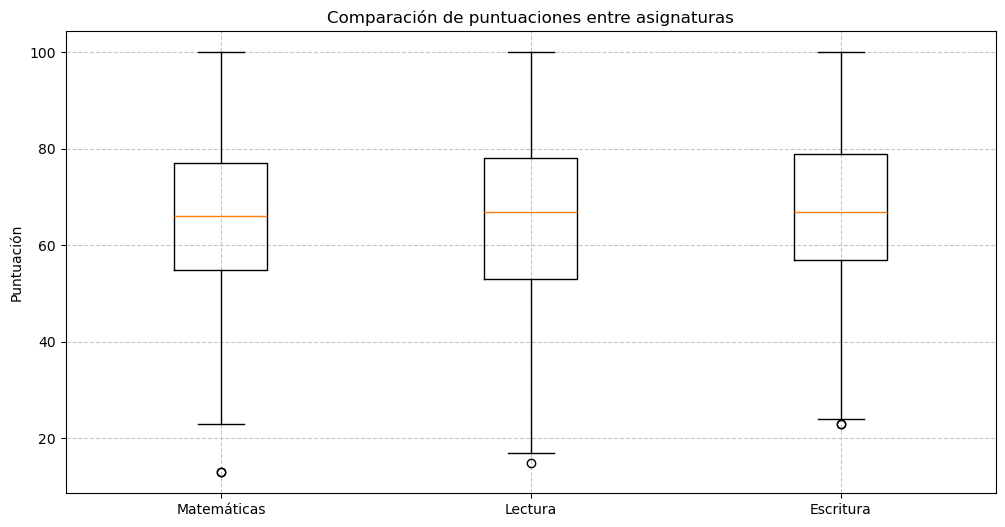

Estadísticas descriptivas para las puntuaciones en Matemáticas:
count    951.000000
mean      66.203996
std       15.438790
min       13.000000
25%       55.000000
50%       66.000000
75%       77.000000
max      100.000000
Name: math score, dtype: float64
Estadísticas descriptivas para las puntuaciones en Lectura:
count    951.000000
mean      64.705573
std       19.012228
min       15.000000
25%       53.000000
50%       67.000000
75%       78.000000
max      100.000000
Name: reading score, dtype: float64
Estadísticas descriptivas para las puntuaciones en Escritura:
count    951.000000
mean      69.929548
std       19.146259
min       23.000000
25%       57.000000
50%       67.000000
75%       79.000000
max      100.000000
Name: writing score, dtype: float64


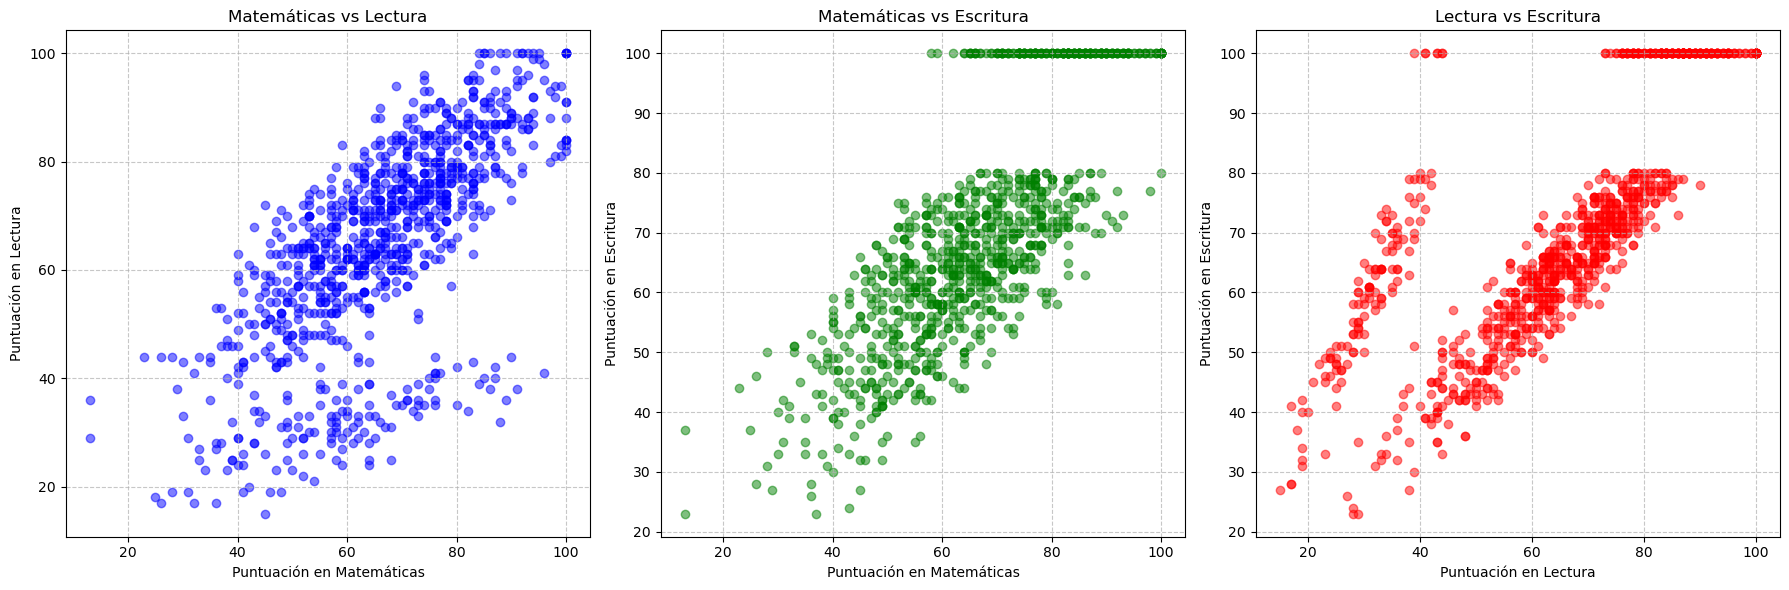

In [ ]:
#  Histogramas para cada asignatura
plt.figure(figsize=(18, 6))

# Histograma para math score
plt.subplot(1, 3, 1)
plt.hist(df['math score'], bins=20, color='lightblue', edgecolor='black')
plt.title('Distribución de puntuaciones en Matemáticas')
plt.xlabel('Puntuación en Matemáticas')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', alpha=0.7)

# Histograma para reading score
plt.subplot(1, 3, 2)
plt.hist(df['reading score'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribución de puntuaciones en Lectura')
plt.xlabel('Puntuación en Lectura')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', alpha=0.7)

# Histograma para writing score
plt.subplot(1, 3, 3)
plt.hist(df['writing score'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribución de puntuaciones en Escritura')
plt.xlabel('Puntuación en Escritura')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Diagramas de caja para cada asignatura
plt.figure(figsize=(12, 6))
plt.boxplot([df['math score'], df['reading score'], df['writing score']], 
            labels=['Matemáticas', 'Lectura', 'Escritura'])
plt.title('Comparación de puntuaciones entre asignaturas')
plt.ylabel('Puntuación')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Estadísticas descriptivas para cada asignatura
print("Estadísticas descriptivas para las puntuaciones en Matemáticas:")
print(df['math score'].describe())

print("\
Estadísticas descriptivas para las puntuaciones en Lectura:")
print(df['reading score'].describe())

print("\
Estadísticas descriptivas para las puntuaciones en Escritura:")
print(df['writing score'].describe())



#  Gráfico de dispersión para ver la relación entre las puntuaciones
plt.figure(figsize=(18, 6))

# Math vs Reading
plt.subplot(1, 3, 1)
plt.scatter(df['math score'], df['reading score'], alpha=0.5, color='blue')
plt.title('Matemáticas vs Lectura')
plt.xlabel('Puntuación en Matemáticas')
plt.ylabel('Puntuación en Lectura')
plt.grid(True, linestyle='--', alpha=0.7)

# Math vs Writing
plt.subplot(1, 3, 2)
plt.scatter(df['math score'], df['writing score'], alpha=0.5, color='green')
plt.title('Matemáticas vs Escritura')
plt.xlabel('Puntuación en Matemáticas')
plt.ylabel('Puntuación en Escritura')
plt.grid(True, linestyle='--', alpha=0.7)

# Reading vs Writing
plt.subplot(1, 3, 3)
plt.scatter(df['reading score'], df['writing score'], alpha=0.5, color='red')
plt.title('Lectura vs Escritura')
plt.xlabel('Puntuación en Lectura')
plt.ylabel('Puntuación en Escritura')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()



Hay outliers. En matemáticas

### 5. Do we have any duplicates? 

### 6.1. Missing values: Remember the column address

### 6.2. What about the missing values of the column Age? 

### 7. What is going on with the math scores?

Hay de 120 que se ha eliminado anteriormente

Dimensiones después de eliminar math score = 120: (951, 12)


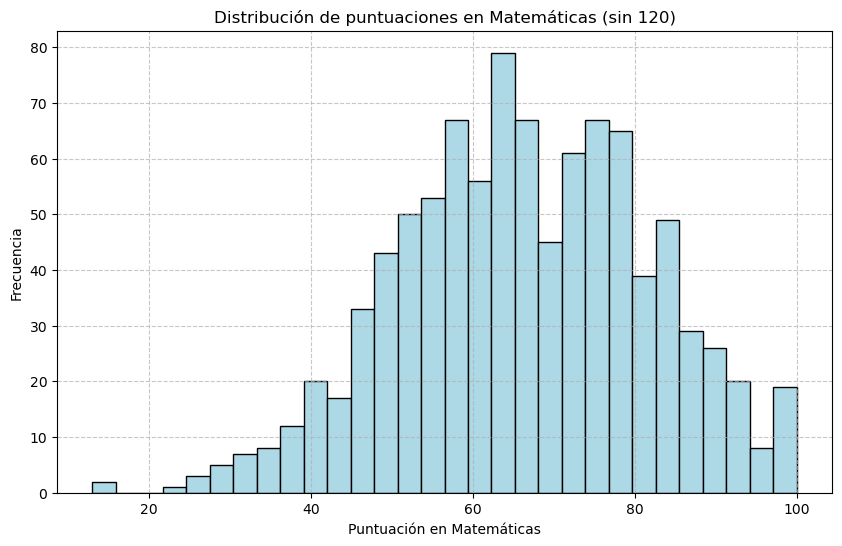

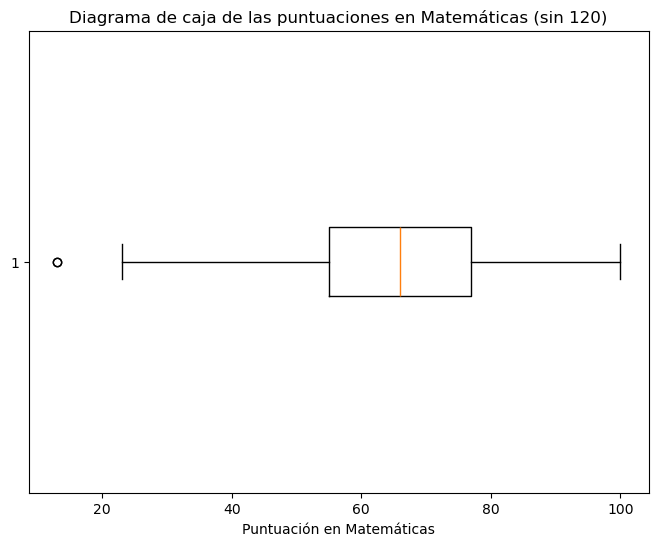

In [28]:
# Eliminamos los registros en los que la puntuación en matemáticas sea 120
df = df[df['math score'] != 120]

print("Dimensiones después de eliminar math score = 120:", df.shape)

# Graficamos la distribución de 'math score' sin el valor 120
plt.figure(figsize=(10,6))
plt.hist(df['math score'], bins=30, color='lightblue', edgecolor='black')
plt.title('Distribución de puntuaciones en Matemáticas (sin 120)')
plt.xlabel('Puntuación en Matemáticas')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Mostramos el diagrama de caja para confirmar la eliminación de outliers
plt.figure(figsize=(8,6))
plt.boxplot(df['math score'], vert=False)
plt.title('Diagrama de caja de las puntuaciones en Matemáticas (sin 120)')
plt.xlabel('Puntuación en Matemáticas')
plt.show()


## Do some initial plots? EDA

Hecho anteriormente

### What do you find interesting?  

- To me the reading score is really intriguing --> We need to really work on understanding what is going on
- The writing score is also characteristic but in principle I am not that worried about it. 

#### We know for a fact that the id_student and the year will not be relevant for any analysis as they are the same value for the whole dataset

Maybe we can delete them from now on

#### What do we care about? The grades are the main problem. Maybe they vary based on any of the other variables

I think we can detect the biggest discrepancies at 3-4 levels: 

- Parental level of education 

- Test preparation course 

- Mybe lunch or gender (I am pretty sure the lunch should not have that much impact but let's still check it)

Let's go deeper

 



Creamos HEATMAPS con los parámetros anteriores y notas para ver si hay alguna correlación

Distribución de calificaciones en Matemáticas:
math_grade
A (90-100)     62
B (80-89)     128
C (70-79)     217
D (60-69)     223
E (50-59)     180
F (0-49)      141
Name: count, dtype: int64
Distribución de calificaciones en Lectura:
reading_grade
A (90-100)     71
B (80-89)     140
C (70-79)     228
D (60-69)     195
E (50-59)     117
F (0-49)      200
Name: count, dtype: int64
Distribución de calificaciones en Escritura:
writing_grade
A (90-100)    208
B (80-89)      17
C (70-79)     212
D (60-69)     229
E (50-59)     153
F (0-49)      132
Name: count, dtype: int64
--- HEATMAPS PARA MATEMÁTICAS ---


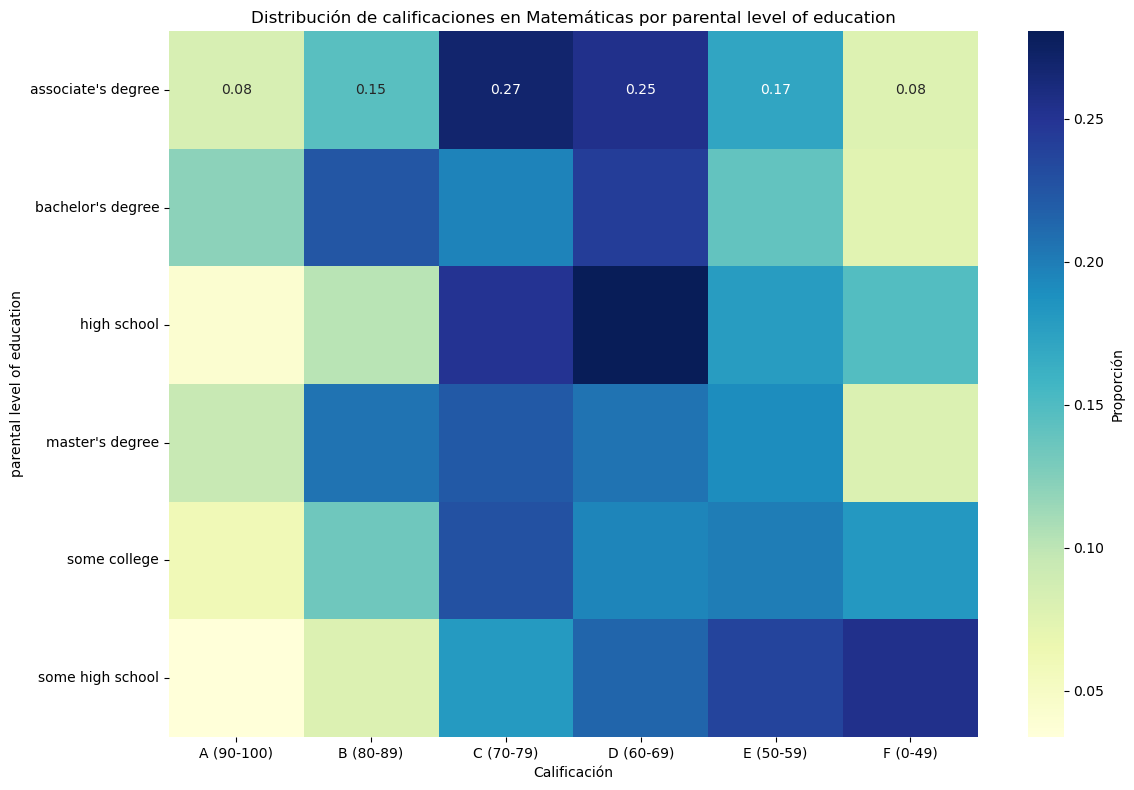

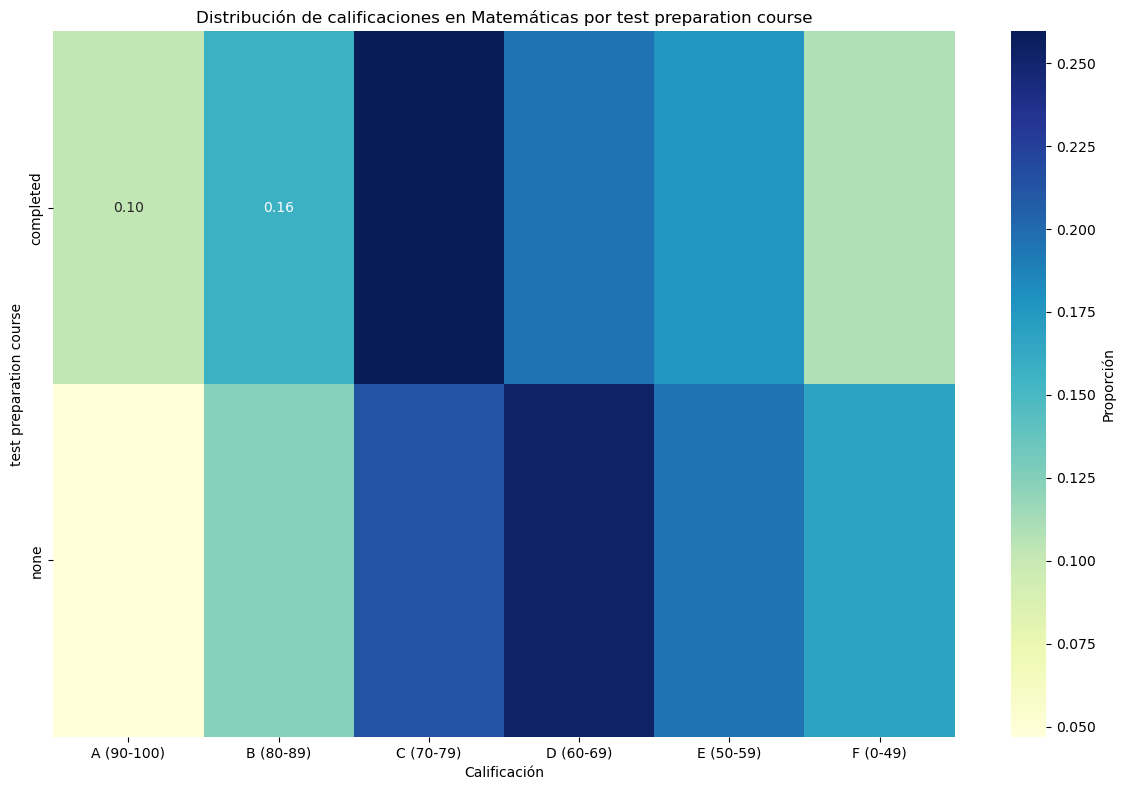

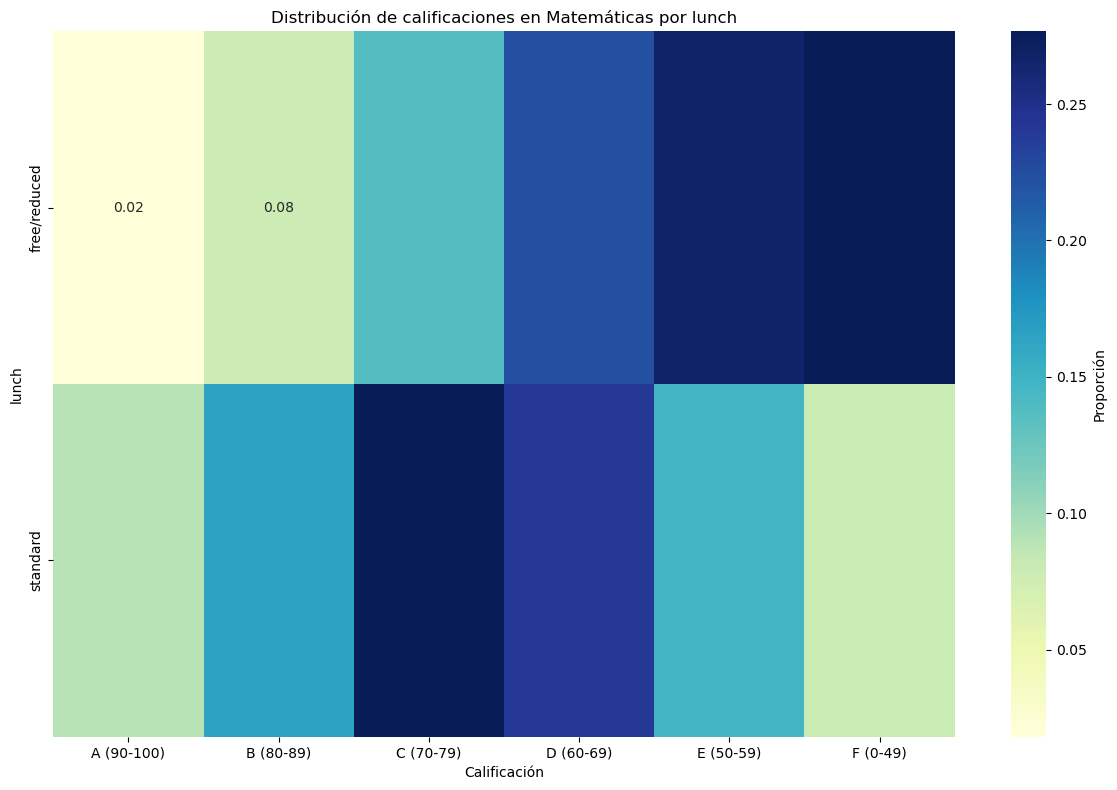

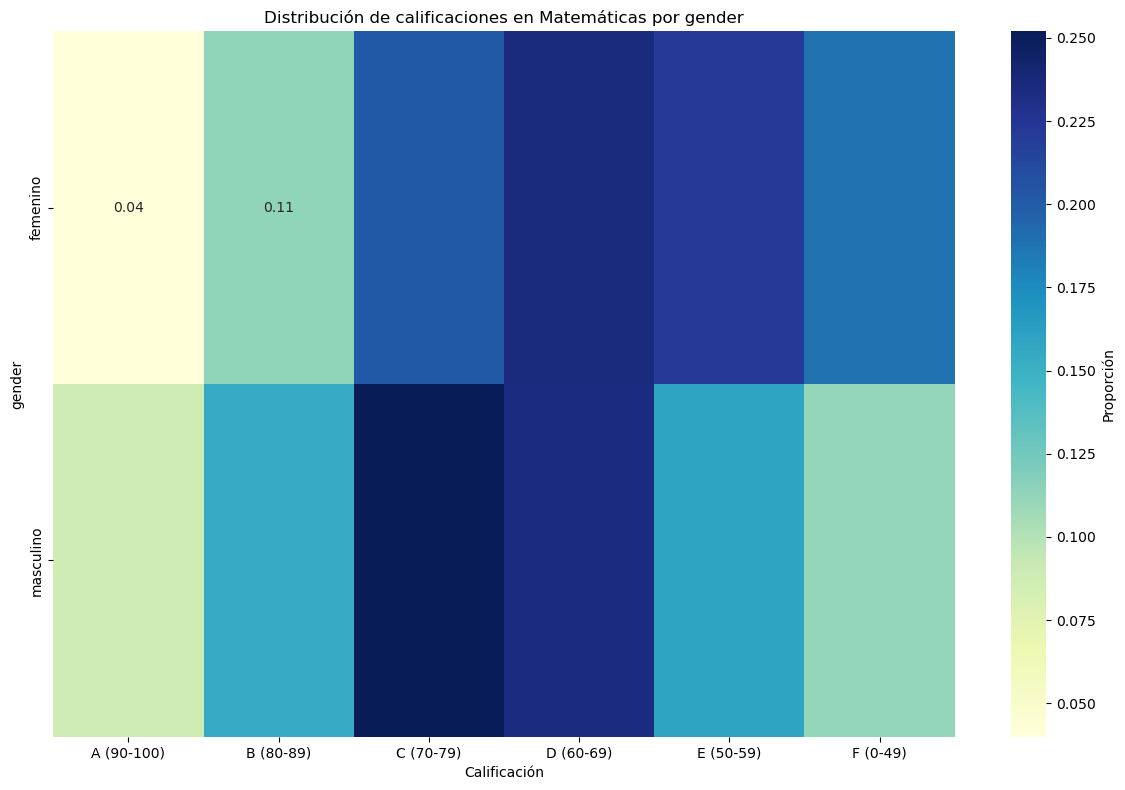

--- HEATMAPS PARA LECTURA ---


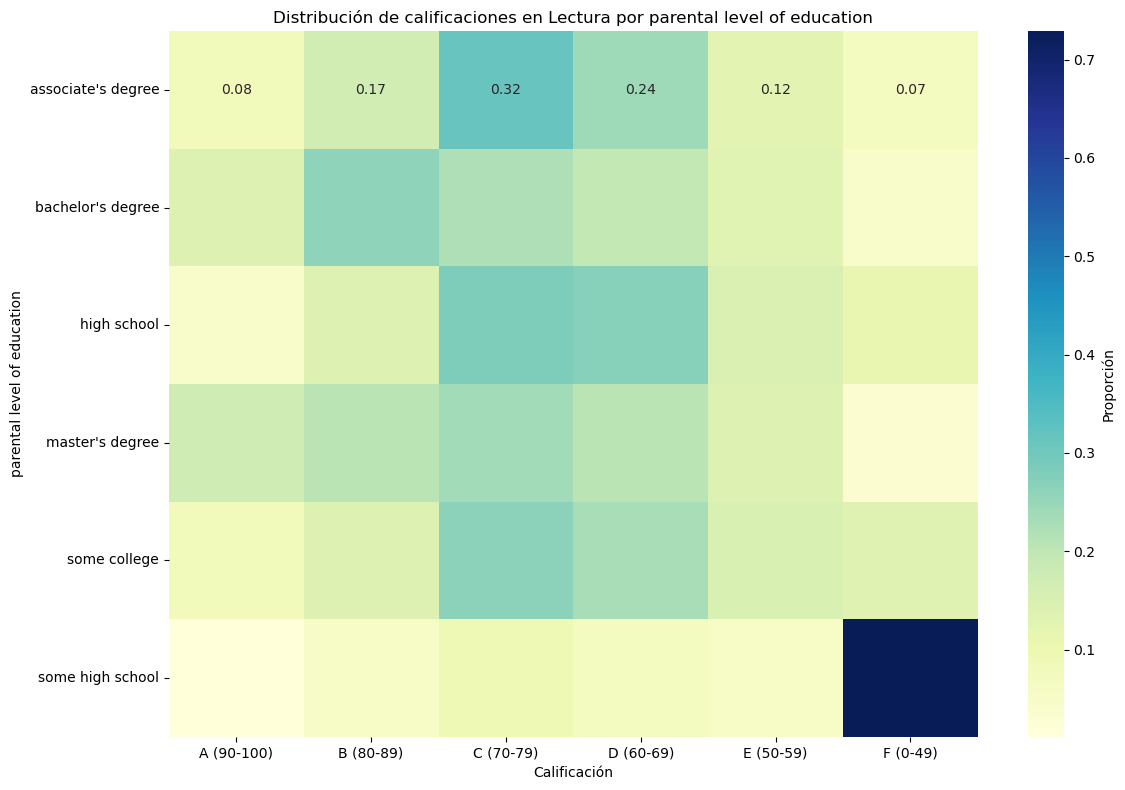

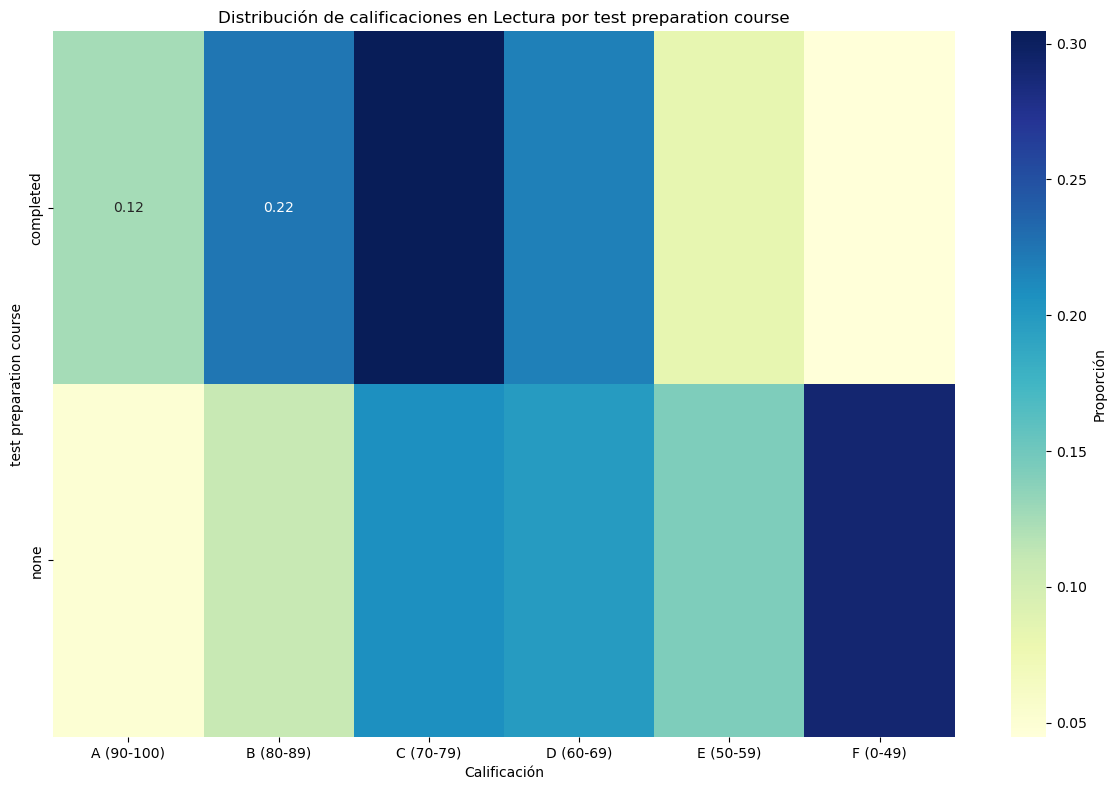

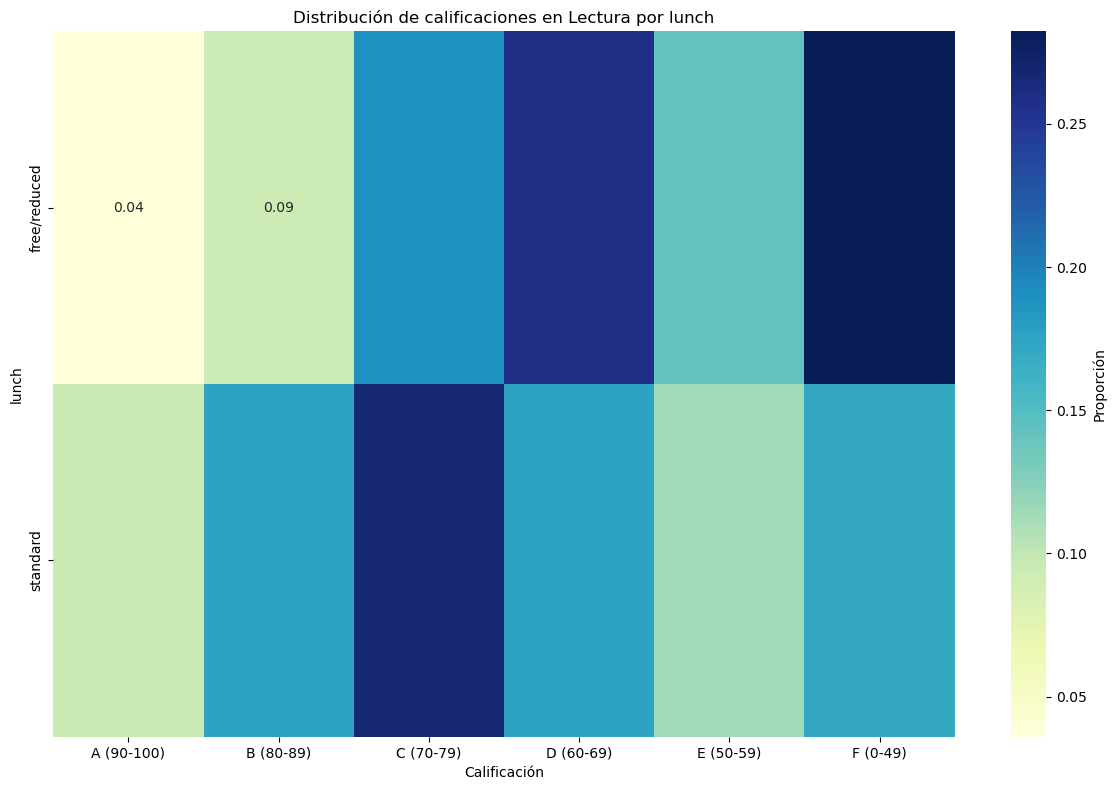

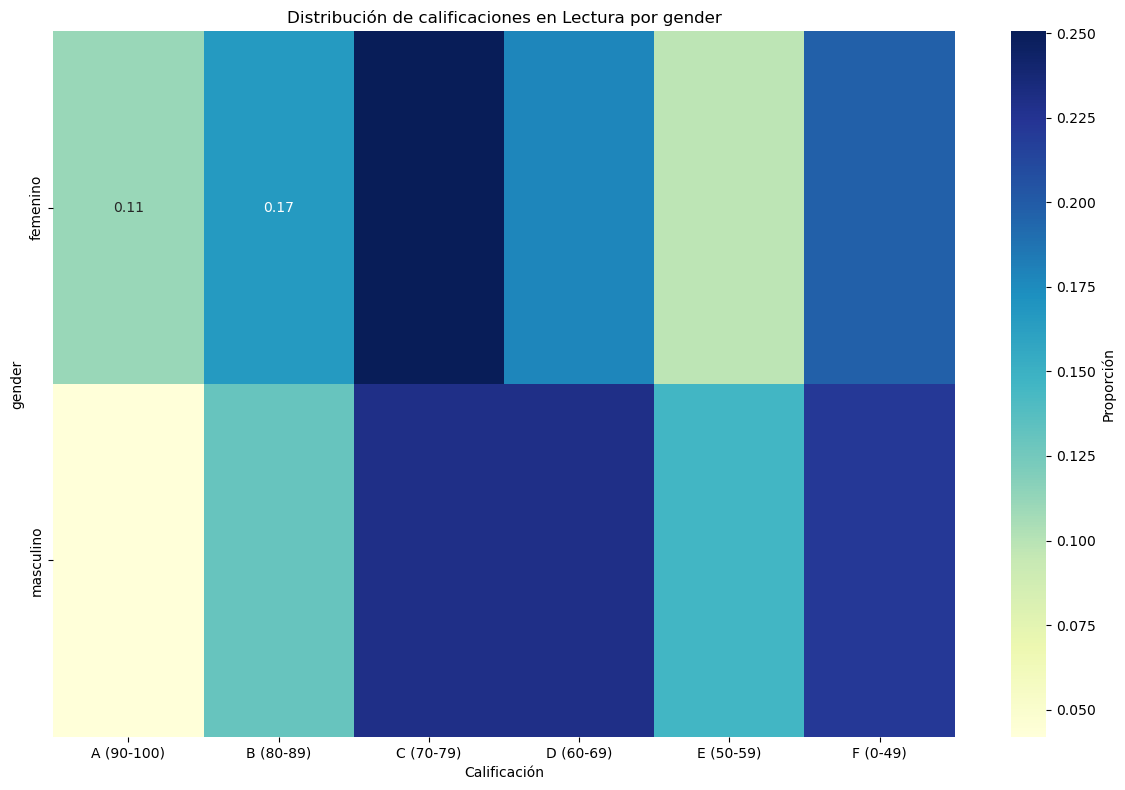

--- HEATMAPS PARA ESCRITURA ---


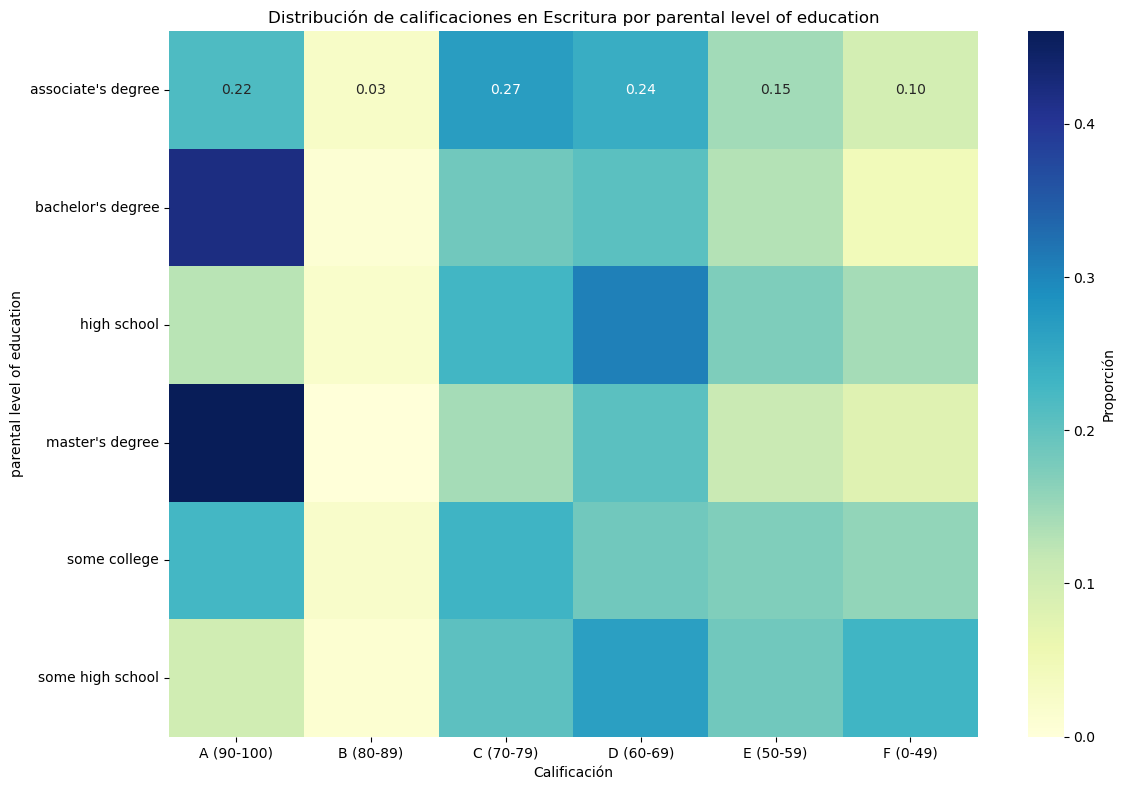

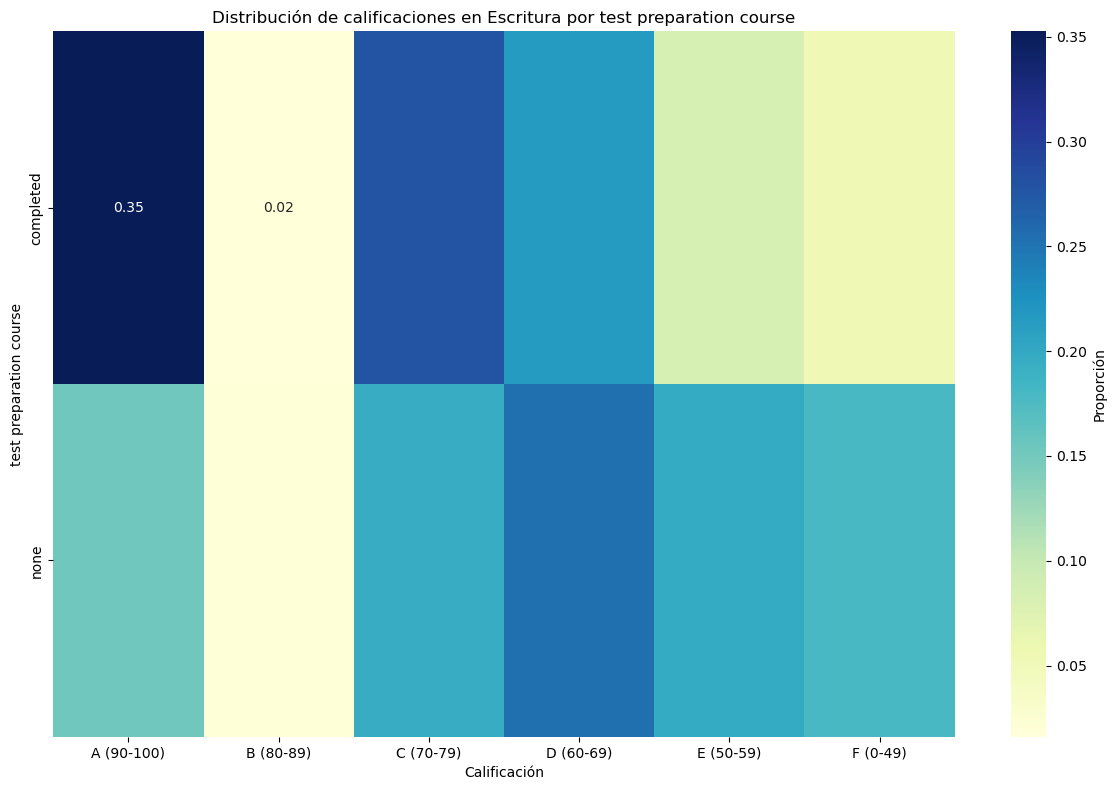

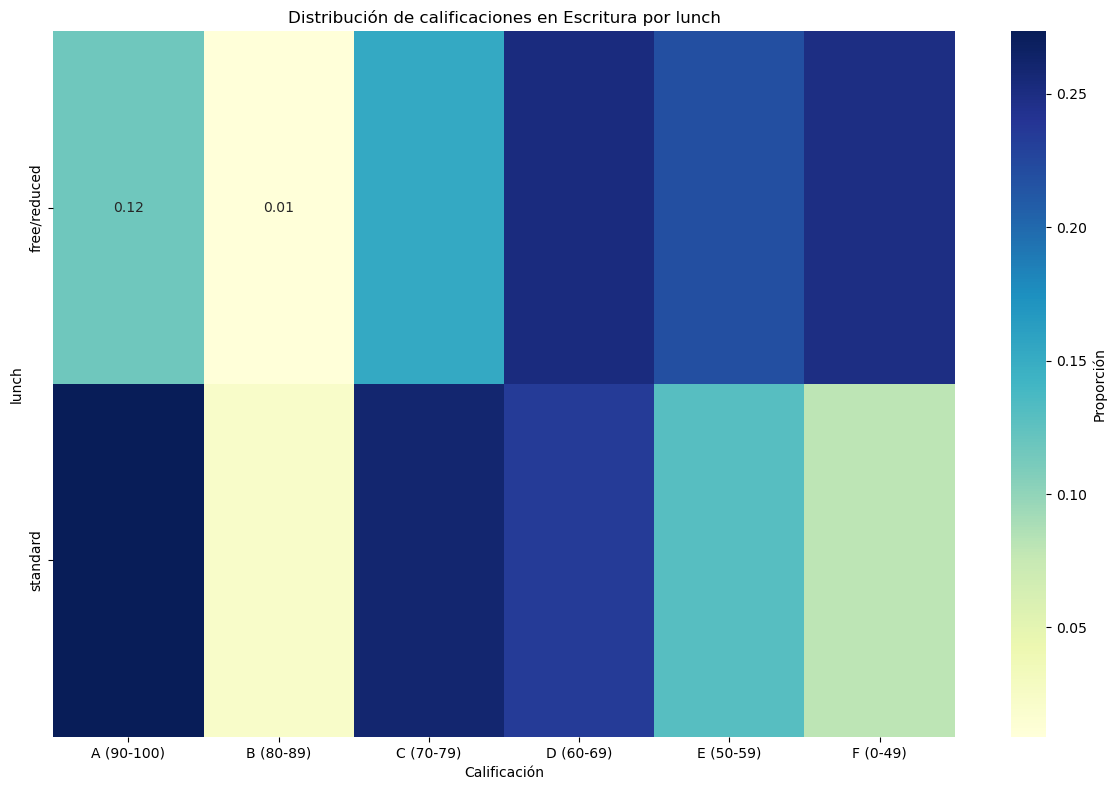

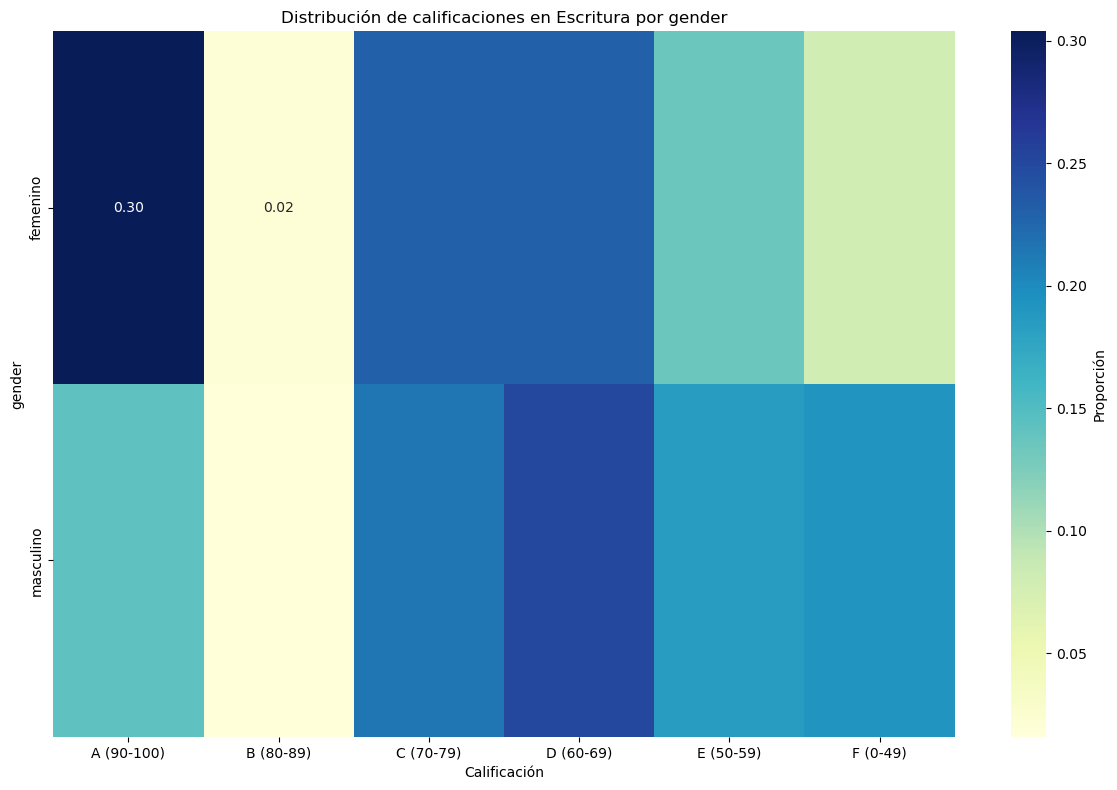

In [32]:
# Función para categorizar las puntuaciones en grados
def categorize_score(score):
    if score >= 90:
        return 'A (90-100)'
    elif score >= 80:
        return 'B (80-89)'
    elif score >= 70:
        return 'C (70-79)'
    elif score >= 60:
        return 'D (60-69)'
    elif score >= 50:
        return 'E (50-59)'
    else:
        return 'F (0-49)'

# Aplicamos la categorización a cada asignatura
df['math_grade'] = df['math score'].apply(categorize_score)
df['reading_grade'] = df['reading score'].apply(categorize_score)
df['writing_grade'] = df['writing score'].apply(categorize_score)

# Verificamos las categorías creadas
print("Distribución de calificaciones en Matemáticas:")
print(df['math_grade'].value_counts().sort_index())

print("\
Distribución de calificaciones en Lectura:")
print(df['reading_grade'].value_counts().sort_index())

print("\
Distribución de calificaciones en Escritura:")
print(df['writing_grade'].value_counts().sort_index())

# Normalizamos el género para asegurar consistencia
df['gender'] = df['gender'].str.lower()

# Creamos una función para generar los heatmaps
def create_heatmap(subject, variable):
    # Creamos una tabla de contingencia
    if subject == 'math':
        grade_col = 'math_grade'
        title = 'Matemáticas'
    elif subject == 'reading':
        grade_col = 'reading_grade'
        title = 'Lectura'
    else:  # writing
        grade_col = 'writing_grade'
        title = 'Escritura'
    
    # Creamos la tabla de contingencia y la normalizamos por filas
    contingency = pd.crosstab(df[variable], df[grade_col], normalize='index')
    
    # Ordenamos las categorías de calificaciones
    grade_order = ['A (90-100)', 'B (80-89)', 'C (70-79)', 'D (60-69)', 'E (50-59)', 'F (0-49)']
    contingency = contingency.reindex(columns=grade_order)
    
    # Creamos el heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(contingency, annot=True, cmap="YlGnBu", fmt='.2f', cbar_kws={'label': 'Proporción'})
    plt.title(f'Distribución de calificaciones en {title} por {variable}')
    plt.ylabel(variable)
    plt.xlabel('Calificación')
    plt.tight_layout()
    plt.show()
    
    return contingency

# 1. Heatmaps para Matemáticas
print("\
--- HEATMAPS PARA MATEMÁTICAS ---")
math_parent = create_heatmap('math', 'parental level of education')
math_prep = create_heatmap('math', 'test preparation course')
math_lunch = create_heatmap('math', 'lunch')
math_gender = create_heatmap('math', 'gender')

# 2. Heatmaps para Lectura
print("\
--- HEATMAPS PARA LECTURA ---")
reading_parent = create_heatmap('reading', 'parental level of education')
reading_prep = create_heatmap('reading', 'test preparation course')
reading_lunch = create_heatmap('reading', 'lunch')
reading_gender = create_heatmap('reading', 'gender')

# 3. Heatmaps para Escritura
print("\
--- HEATMAPS PARA ESCRITURA ---")
writing_parent = create_heatmap('writing', 'parental level of education')
writing_prep = create_heatmap('writing', 'test preparation course')
writing_lunch = create_heatmap('writing', 'lunch')
writing_gender = create_heatmap('writing', 'gender')



CONCLUSIONES:

- Nivel educativo de los padres: Factor con fuerte influencia en todas las asignaturas, especialmente en Matemáticas.

- Preparación para el examen: Impacto positivo consistente en todas las asignaturas, destacando la importancia de la preparación estructurada.

- Tipo de almuerzo: Indicador de posibles diferencias socioeconómicas que afectan el rendimiento académico.

- Género: Patrones diferentes según la asignatura. Ligera ventaja masculina en Matemáticas y clara ventaja femenina en Lectura y Escritura, especialmente en esta última

### 2-variable Analysis with Lunch column 

### 2-variable Analysis with gender column 

### 2-variable Analysis with Test preparation course column 

### What is next?

- Get the story together
- Improve your code
- Get some statistics of the differences you want to show 
- Work on the plots to show the data nicely 
- Get the presentation ready 
- Show what you found to the client